In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 142s 5us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 26s 6us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [10]:
import tensorflow as tf

print("TensorFlow version: " + tf.__version__)

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    print("Running on TPU", tpu.cluster_spec().as_dict()['worker'])
    # Connect to TPU and initialize
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("No TPU detected. Running on CPU or GPU instead.")
    strategy = tf.distribute.MirroredStrategy()  # Fallback for CPU/GPU

print("Running with strategy:", strategy)


TensorFlow version: 2.17.0
No TPU detected. Running on CPU or GPU instead.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Running with strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x0000029B7ED3A0A0>


In [11]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

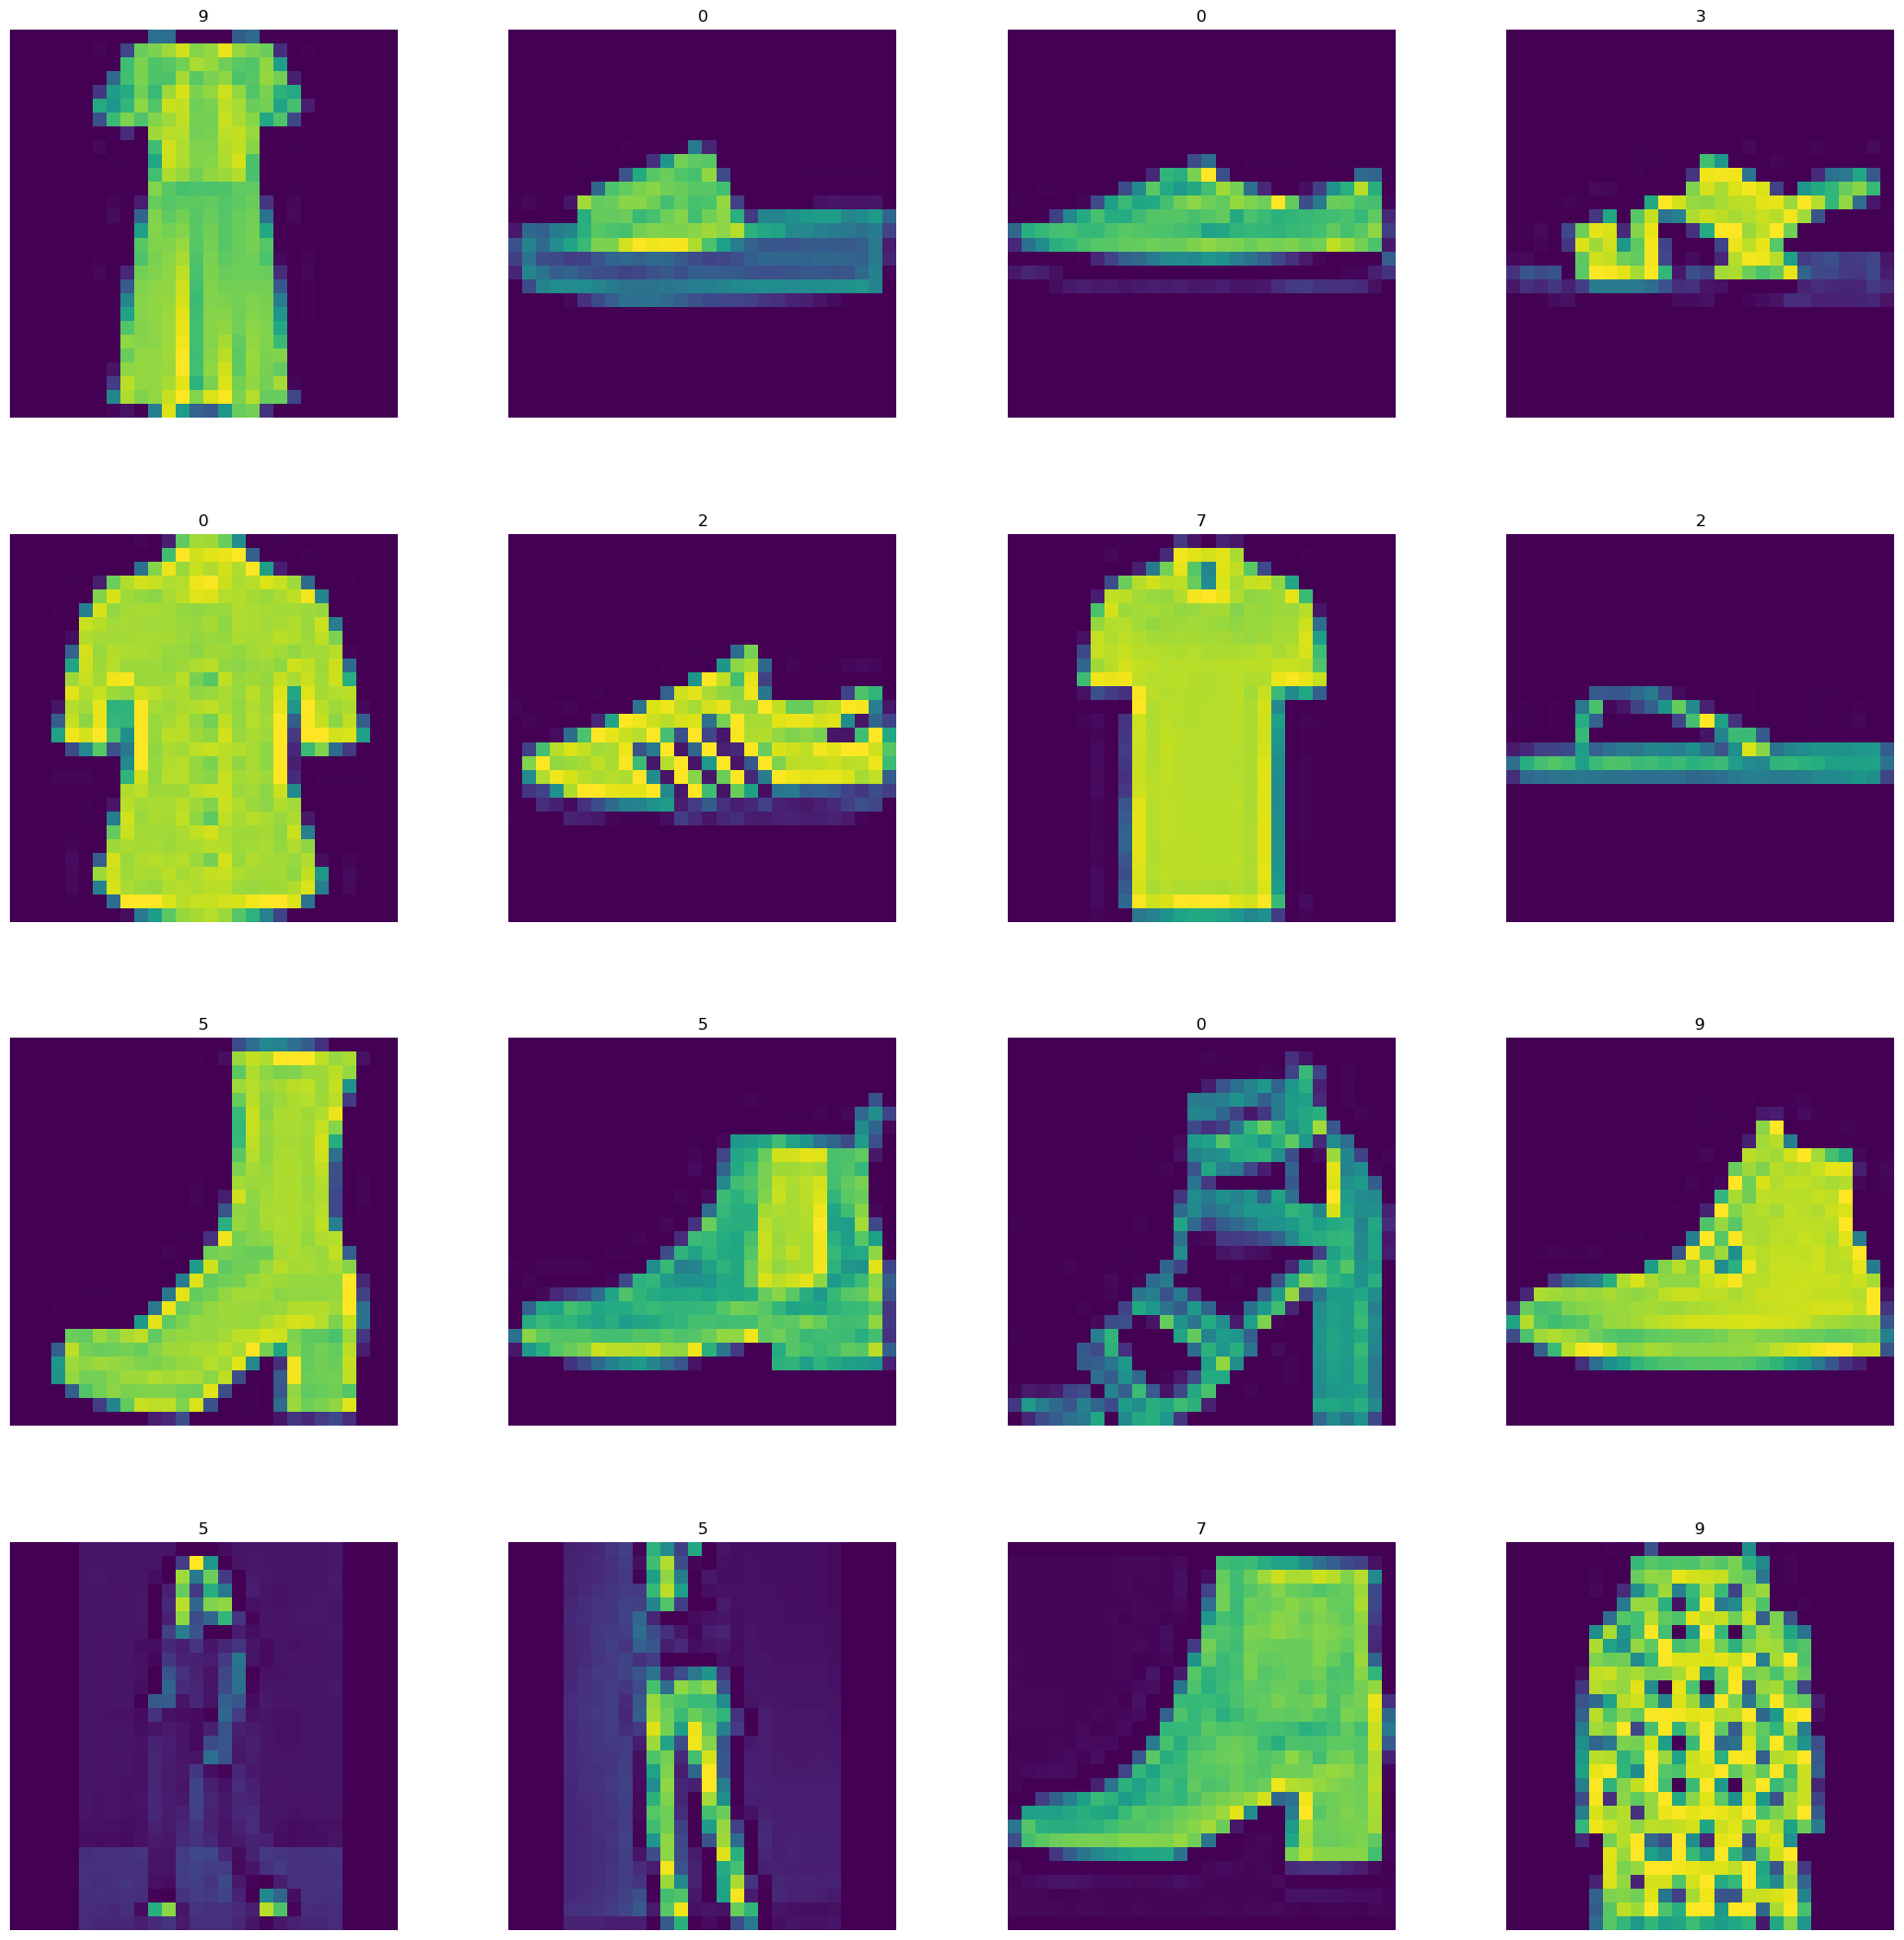

In [17]:
L_grid=4
W_grid=4
fig, axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(x_train)
import random
for i in range(0,L_grid*W_grid):
    index=random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[i])
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.3)

In [18]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
x_train=x_train/255
x_test=x_test/255

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [38]:
def create_model():
    classifier=Sequential()
    classifier.add(Conv2D(filters=64,kernal_size=(3,3),activation="relu", input_shape=(28,28,1)))
    classifier.add(MaxPoolng2D((2,2)))
    classifier.add(Dropout(rate=0.2))
    classifier.add(conv2D(filter=64,kernal_size=(3,3), sctivation="relu"))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Dropout(0,2))
    classifier.add(Flatten())
    classifier.add(Dense(unit=128,activation="relu"))
    classifier.add(Dense(units=10, activation="softmax"))
    return classifier

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def create_model():
    classifier = Sequential()
    
    # First Conv2D layer with correct kernel_size spelling
    classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
    classifier.add(MaxPooling2D((2, 2)))  # Corrected MaxPooling2D spelling
    classifier.add(Dropout(rate=0.2))
    
    # Second Conv2D layer with correct spelling
    classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    classifier.add(MaxPooling2D((2, 2)))
    classifier.add(Dropout(rate=0.2))  # Corrected Dropout call
    
    # Flatten layer and fully connected Dense layers
    classifier.add(Flatten())
    classifier.add(Dense(units=128, activation="relu"))  # Corrected 'unit' to 'units'
    classifier.add(Dense(units=10, activation="softmax"))
    
    return classifier

# Model creation and compilation with strategy.scope()
with strategy.scope():
    model = create_model()
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Now you can continue training your model as usual
# For example:
# model.fit(train_data, train_labels, epochs=5)



C:\Users\sireesha katikireddy\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Compile the model with sparse_categorical_crossentropy
with strategy.scope():
    model = create_model()
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Now fit the model with integer labels
model.fit(x_train.astype(np.float32), y_train.astype(np.float32), epochs=18, batch_size=32)


Epoch 1/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 44ms/step - accuracy: 0.7649 - loss: 0.6367
Epoch 2/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.8765 - loss: 0.3373
Epoch 3/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.8963 - loss: 0.2833
Epoch 4/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9032 - loss: 0.2549
Epoch 5/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9149 - loss: 0.2285
Epoch 6/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 53ms/step - accuracy: 0.9186 - loss: 0.2209
Epoch 7/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9251 - loss: 0.1968
Epoch 8/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9271 - loss: 0.1899
Epoch 9/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 54ms/step - accuracy: 0.9323 - loss: 0.1760
Epoch 10/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9380 - loss: 0.1632
Epoch 11/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9402 - loss: 0.1558
Epoc

In [46]:
import numpy as np

# Predict the class probabilities
y_pred_prob = model.predict(x_test)

# Convert the probabilities to class labels by taking the index of the maximum probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Now y_pred contains the predicted class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [47]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

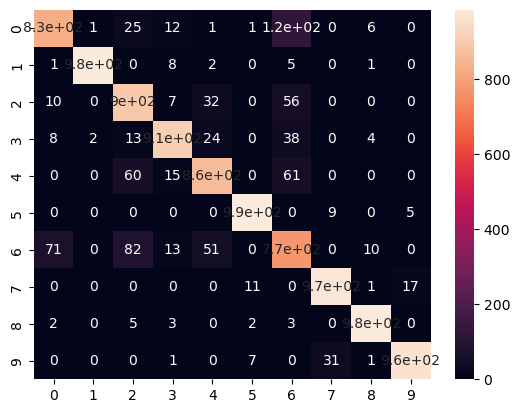

In [49]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9158

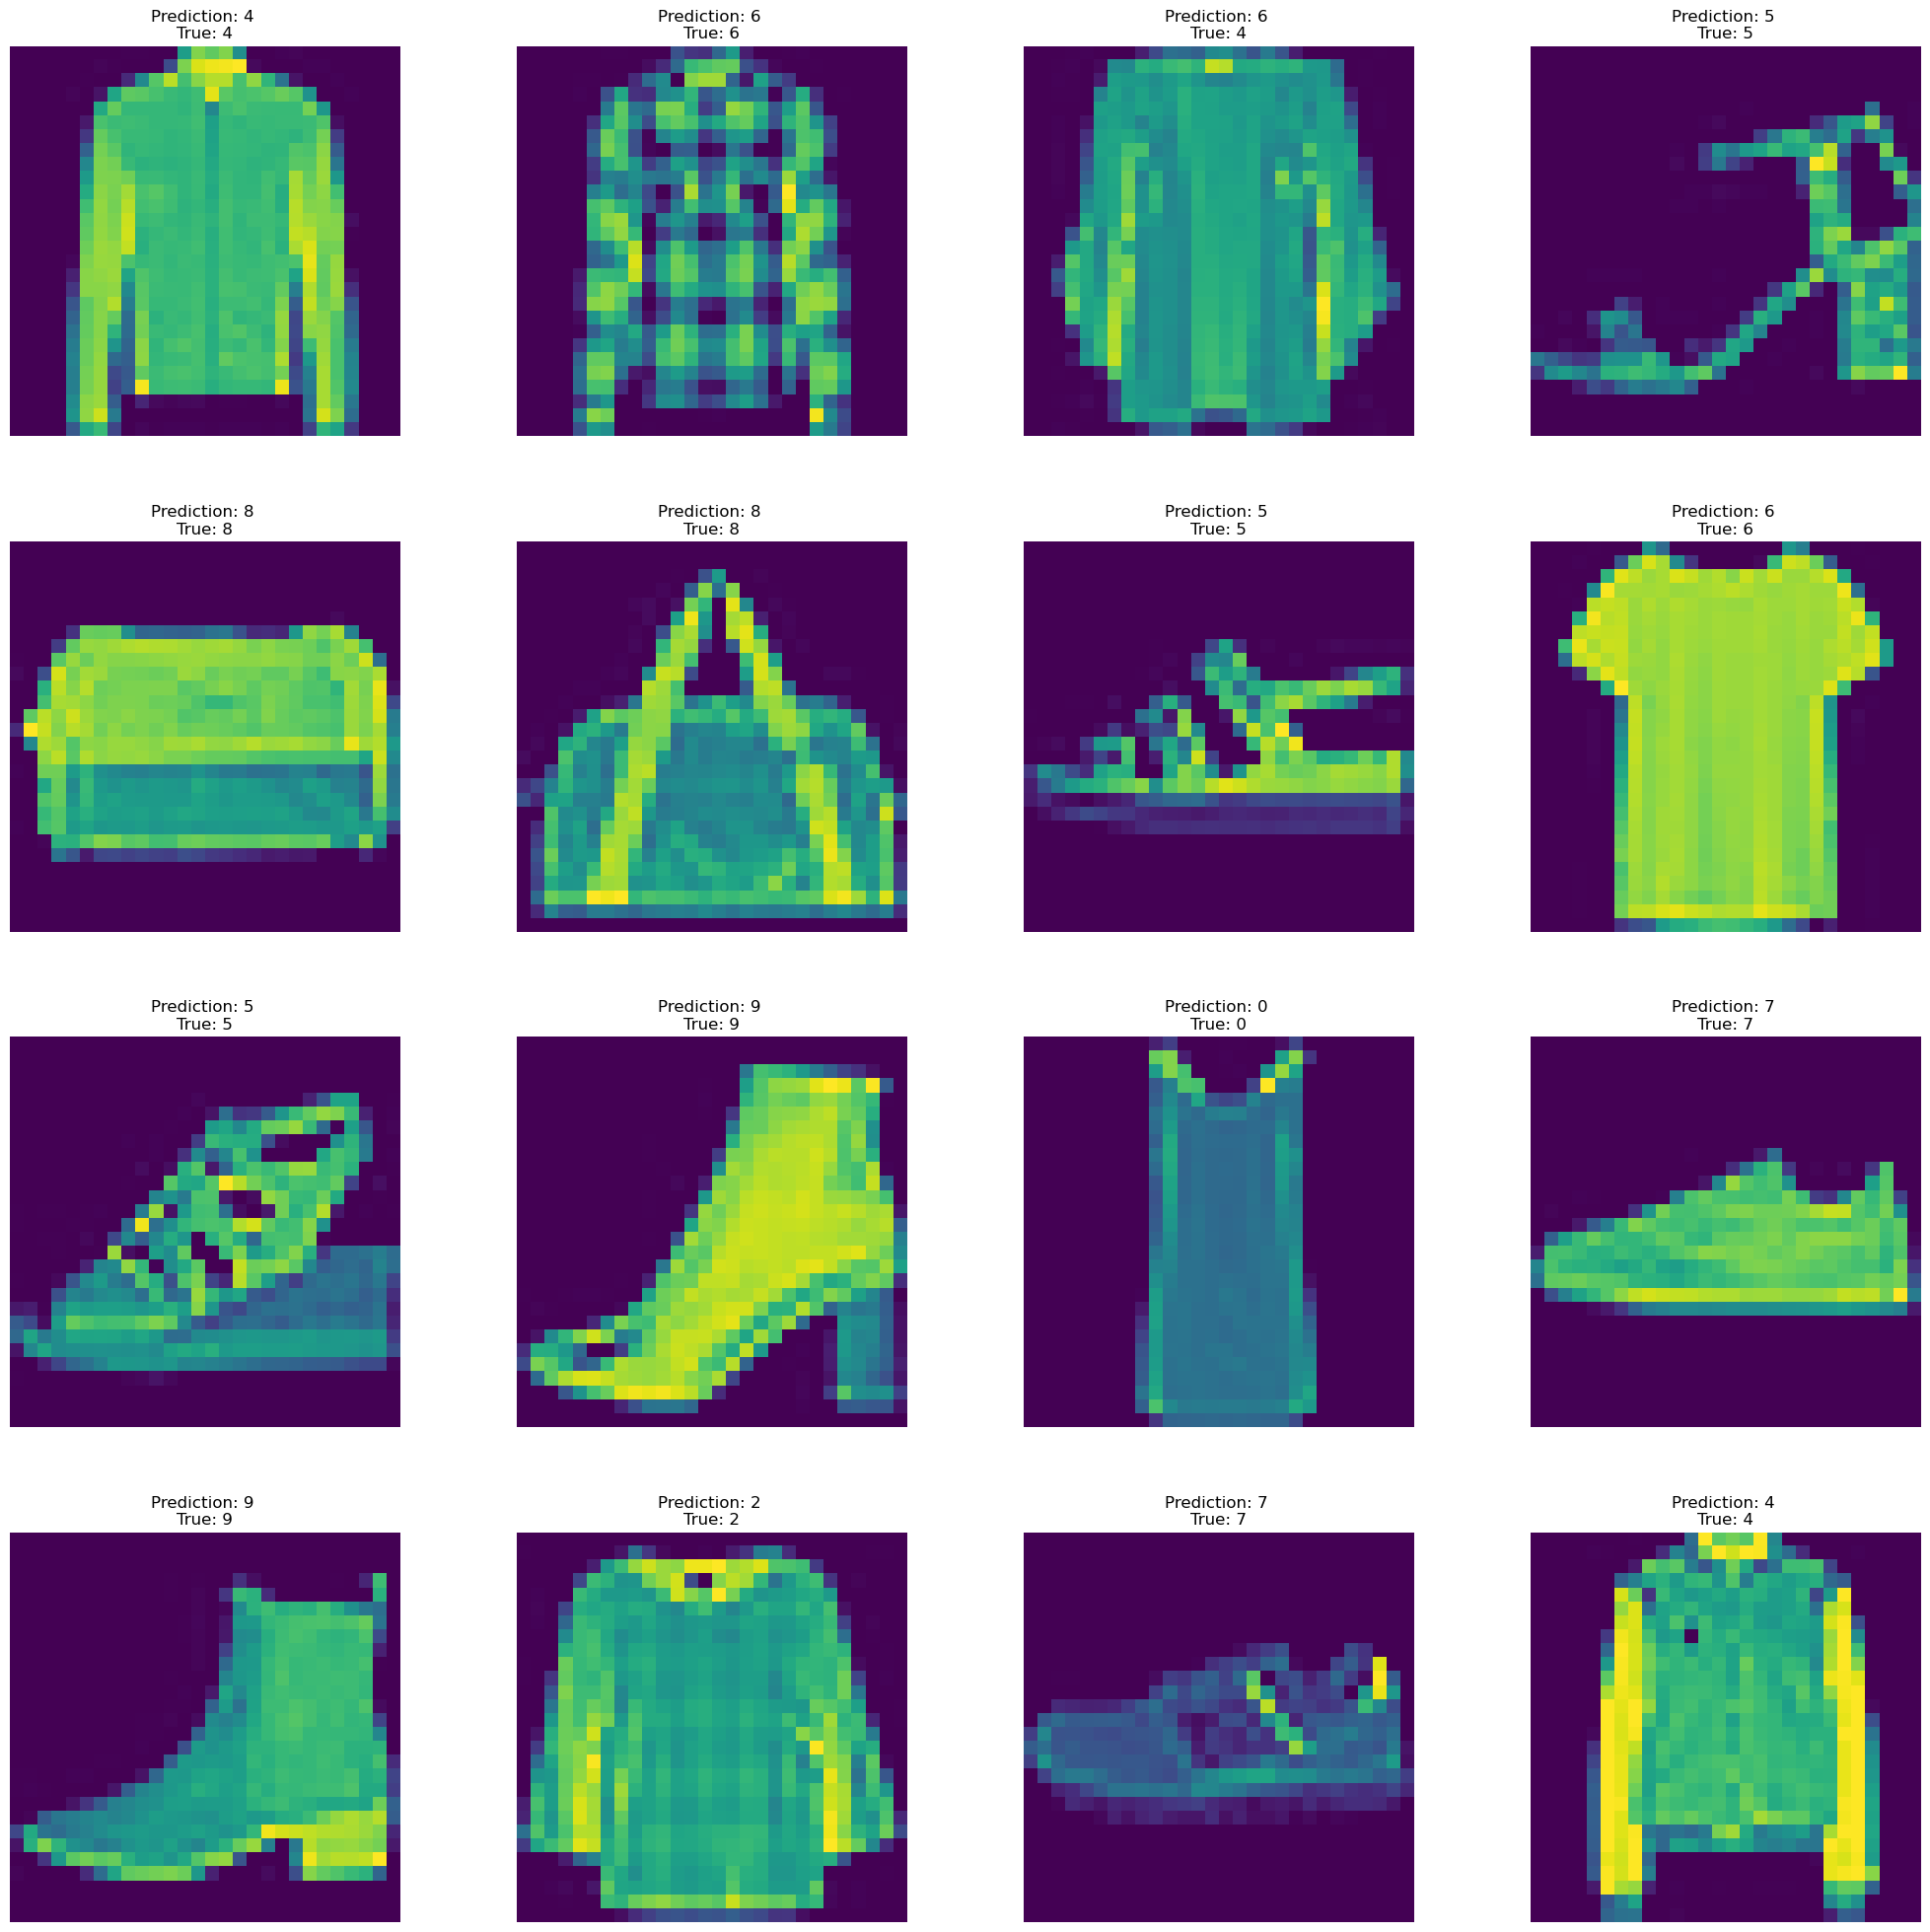

In [53]:
import matplotlib.pyplot as plt
import random

l = 4  # Number of rows
w = 4  # Number of columns

# Correct plt.subplots() usage and fix figsize syntax
fig, axes = plt.subplots(l, w, figsize=(25, 25))  
axes = axes.ravel()  # Flatten the 2D array of axes into 1D array
n_test = len(x_test)

for i in range(0, l * w):
    index = random.randint(0, n_test - 1)  # Corrected to use random index from 0 to n_test-1
    axes[i].imshow(x_test[index])  # Use the randomly chosen index
    axes[i].set_title("Prediction: {} \nTrue: {}".format(y_pred[index], y_test[index]))  # Corrected to set_title instead of set.title
    axes[i].axis("off")  # Corrected arr[i] to axes[i] to turn off the axis

plt.subplots_adjust(wspace=0.3)
plt.show()  # Added plt.show() to display the plot
